# Montando o Drive

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


# Baixando o dataset

In [2]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("sunnykusawa/ecommerce-products-image-dataset")

print("Path to dataset files:", path)

100%|██████████| 40.4M/40.4M [00:00<00:00, 109MB/s]

Extracting files...


Path to dataset files: /root/.cache/kagglehub/datasets/sunnykusawa/ecommerce-products-image-dataset/versions/1


# Tensor Flow e Dependências

In [4]:
!pip install tensorflow
import tensorflow
from keras.applications.resnet50 import ResNet50, preprocess_input
from keras.layers import GlobalMaxPooling2D

# Modifique o modelo

In [5]:
model=ResNet50(weights='imagenet',include_top=False,input_shape=(224,224,3))
model.trainable=False

94765736/94765736 ━━━━━━━━━━━━━━━━━━━━ 1s 0us/step


# Adicionando o GlobalMaxPooling2D

In [6]:
model=tensorflow.keras.Sequential([
    model,
    GlobalMaxPooling2D()
])
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ resnet50 (Functional)                │ (None, 7, 7, 2048)          │      23,587,712 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ global_max_pooling2d                 │ (None, 2048)                │               0 │
│ (GlobalMaxPooling2D)                 │                             │                 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 23,587,712 (89.98 MB)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 23,587,712 (89.98 MB)

# Importando o CV2

In [7]:
import cv2
import numpy as np

In [8]:
def extract_feature(img_path, model):
  img=cv2.imread(img_path)
  img=cv2.resize(img,(224,224))
  img=np.array(img)
  expand_img=np.expand_dims(img,axis=0)
  pre_img=preprocess_input(expand_img)
  result=model.predict(pre_img).flatten()
  normalized_result=result/np.linalg.norm(result)
  return normalized_result

In [9]:
!pip install tqdm
import os
from tqdm import tqdm

In [10]:
filename_jeans=[]
feature_list_jeans=[]
for file in os.listdir('/content/ecommerce products/jeans'):
  try:
    filename_jeans.append(os.path.join('/content/ecommerce products/jeans',file))
    feature_list_jeans.append(extract_feature(os.path.join('/content/ecommerce products/jeans',file),model))
  except:
    pass

1/1 ━━━━━━━━━━━━━━━━━━━━ 3s 3s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 204ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 195ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 193ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 192ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 193ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 191ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 197ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 196ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 194ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 203ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 195ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 194ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 211ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 323ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 330ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 334ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 321ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 333ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 313ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 337ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 326ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 344ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 336ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 368ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 

In [11]:
filename_sofa=[]
feature_list_sofa=[]
for file in os.listdir('/content/ecommerce products/sofa'):
  try:
    filename_sofa.append(os.path.join('/content/ecommerce products/sofa',file))
    feature_list_sofa.append(extract_feature(os.path.join('/content/ecommerce products/sofa',file),model))
  except:
    pass

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 194ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 213ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 201ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 214ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 198ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 257ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 212ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 200ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 201ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 207ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 198ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 194ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 196ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 203ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 202ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 220ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 207ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 197ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 195ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 211ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 207ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 189ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 206ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 209ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 201ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 

In [12]:
filename_tshirt=[]
feature_list_tshirt=[]
for file in os.listdir('/content/ecommerce products/tshirt'):
  try:
    filename_tshirt.append(os.path.join('/content/ecommerce products/tshirt',file))
    feature_list_tshirt.append(extract_feature(os.path.join('/content/ecommerce products/tshirt',file),model))
  except:
    pass

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 191ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 203ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 356ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 413ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 345ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 346ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 380ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 308ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 855ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 659ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 795ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 454ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 423ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 357ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 315ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 212ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 193ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 192ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 197ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 225ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 193ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 202ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 193ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 211ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 192ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 

In [13]:
filename_tv=[]
feature_list_tv=[]
for file in os.listdir('/content/ecommerce products/tv'):
  try:
    filename_tv.append(os.path.join('/content/ecommerce products/tv',file))
    feature_list_tv.append(extract_feature(os.path.join('/content/ecommerce products/tv',file),model))
  except:
    pass

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 212ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 198ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 197ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 195ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 204ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 195ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 199ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 195ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 206ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 198ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 190ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 210ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 198ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 197ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 197ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 228ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 194ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 199ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 195ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 218ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 199ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 190ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 193ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 209ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 259ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 

# Scikit-learn

In [15]:
import sklearn
print("Scikit-learn version:", sklearn.__version__)

Scikit-learn version: 1.6.1


In [16]:
from sklearn.neighbors import NearestNeighbors

------------------------------------ ORIGINAL IMAGE ------------------------------------



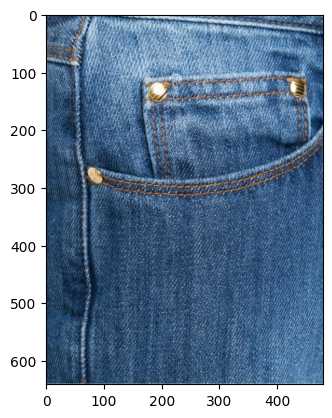

------------------------------------ RECOMMENDED IMAGES ------------------------------------

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 244ms/step


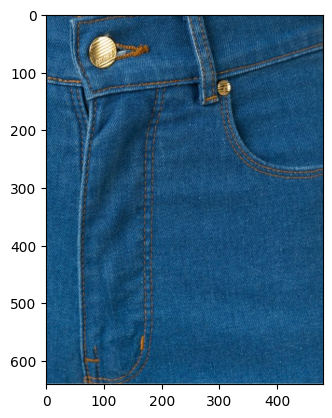

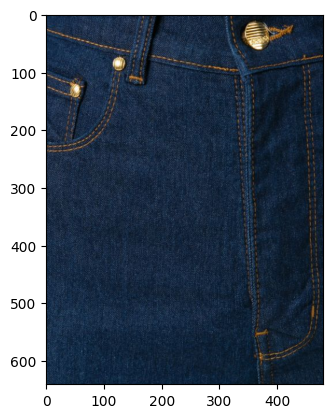

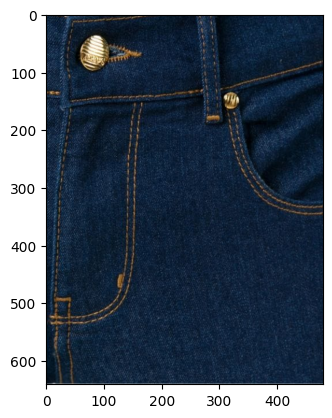

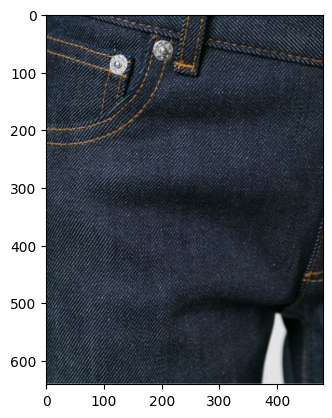

In [24]:
# Jeans Recommendations

import matplotlib.pyplot as plt
from sklearn.neighbors import NearestNeighbors

print("------------------------------------ ORIGINAL IMAGE ------------------------------------\n")

plt.imshow(plt.imread("/content/ecommerce products/jeans/199.jpg"))
plt.show()

print("------------------------------------ RECOMMENDED IMAGES ------------------------------------\n")

# Create and fit NearestNeighbors model
neighbors = NearestNeighbors(n_neighbors=5, algorithm='brute', metric='euclidean')
neighbors.fit(feature_list_jeans)

# Find the nearest neighbors for the original image
distances, indices_jeans = neighbors.kneighbors([extract_feature("/content/ecommerce products/jeans/199.jpg", model)])

# Display recommended images
for file_jeans in indices_jeans[0][1:5]:  # indices_jeans now contains the indices of nearest neighbors
  plt.imshow(plt.imread(filename_jeans[file_jeans]))
  plt.show()

------------------------------------ ORIGINAL IMAGE ------------------------------------



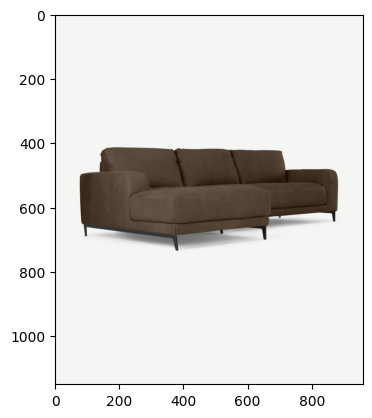

------------------------------------ RECOMMENDED IMAGES ------------------------------------



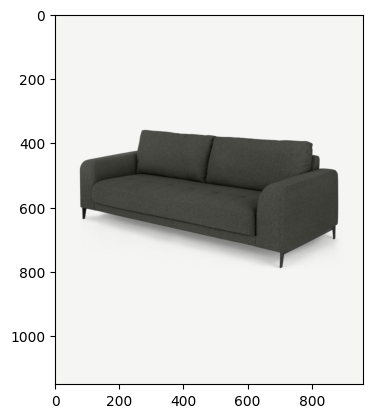

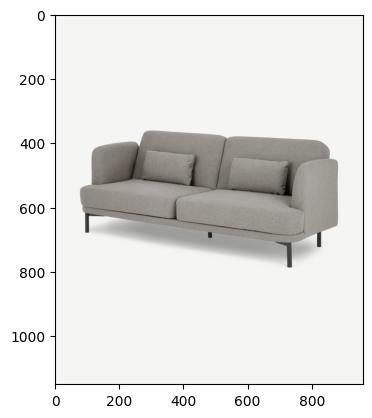

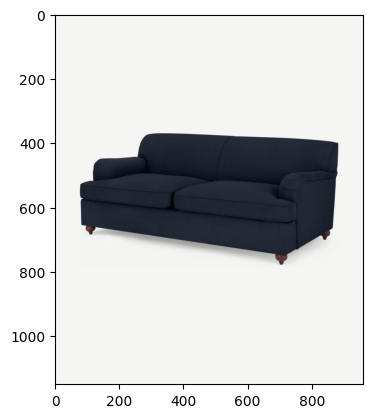

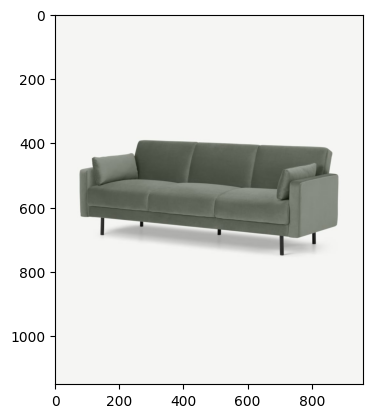

In [25]:
# Sofa Recommendations

# Assuming feature_list_sofa contains the features of your sofa images
neighbors_sofa = NearestNeighbors(n_neighbors=5, algorithm='brute', metric='euclidean')
neighbors_sofa.fit(feature_list_sofa)

# Get the nearest neighbors for the first sofa image (index 0)
distances_sofa, indices_sofa = neighbors_sofa.kneighbors([feature_list_sofa[0]])

print("------------------------------------ ORIGINAL IMAGE ------------------------------------\n")

plt.imshow(plt.imread("/content/ecommerce products/sofa/10.jpg"))
plt.show()

print("------------------------------------ RECOMMENDED IMAGES ------------------------------------\n")
for file_sofa in indices_sofa[0][1:5]: # indices_sofa is now defined
  plt.imshow(plt.imread(filename_sofa[file_sofa]))
  plt.show()

------------------------------------ ORIGINAL IMAGE ------------------------------------



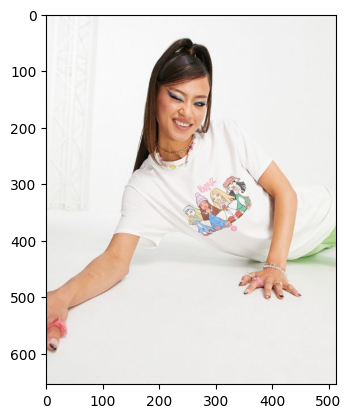

------------------------------------ RECOMMENDED IMAGES ------------------------------------



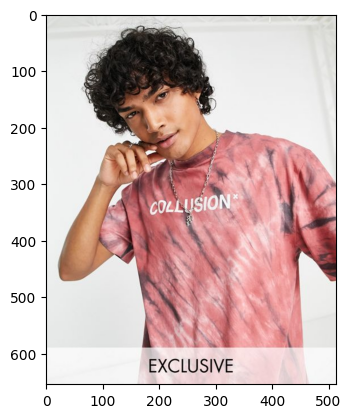

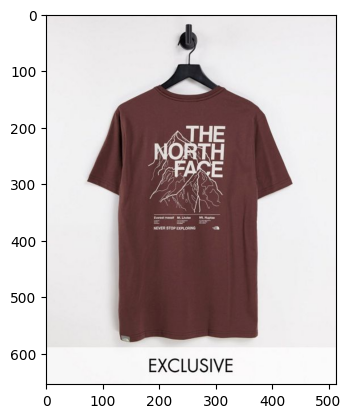

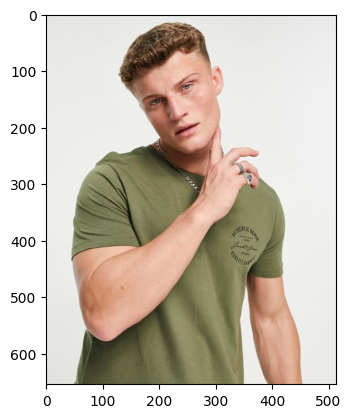

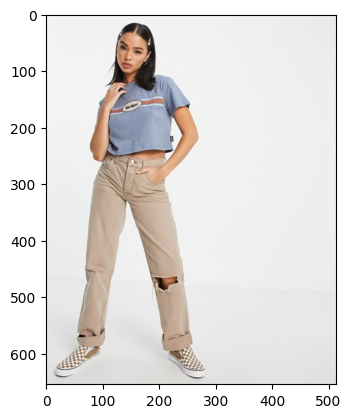

In [26]:
# Tshirt Recommendations

# Assuming feature_list_tshirt contains the features of your tshirt images
neighbors_tshirt = NearestNeighbors(n_neighbors=5, algorithm='brute', metric='euclidean')
neighbors_tshirt.fit(feature_list_sofa)

# Get the nearest neighbors for the first tshirt image (index 0)
distances_tshirt, indices_tshirt = neighbors_tshirt.kneighbors([feature_list_tshirt[0]])


print("------------------------------------ ORIGINAL IMAGE ------------------------------------\n")

plt.imshow(plt.imread("/content/ecommerce products/tshirt/101.jpg"))
plt.show()

print("------------------------------------ RECOMMENDED IMAGES ------------------------------------\n")
for file_tshirt in indices_tshirt[0][1:5]:
  plt.imshow(plt.imread(filename_tshirt[file_tshirt]))
  plt.show()

------------------------------------ ORIGINAL IMAGE ------------------------------------



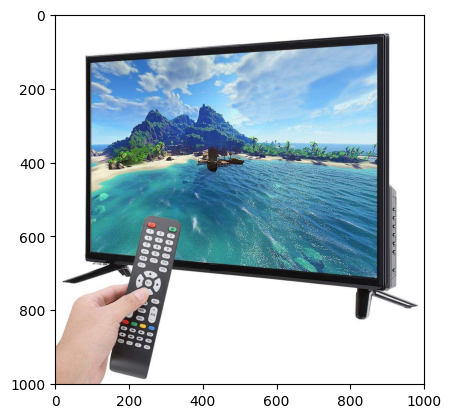

------------------------------------ RECOMMENDED IMAGES ------------------------------------



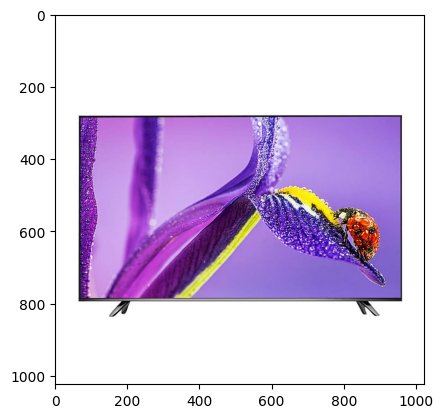

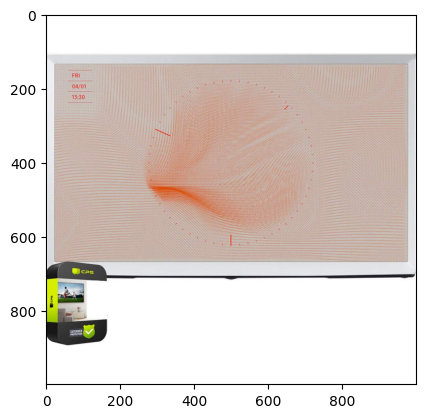

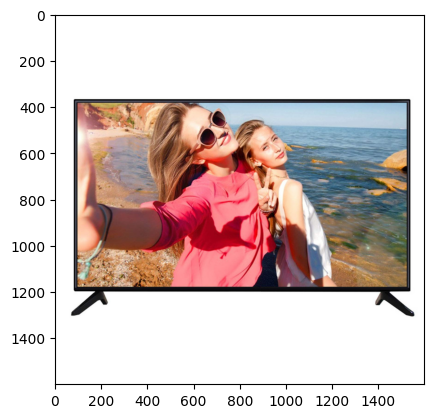

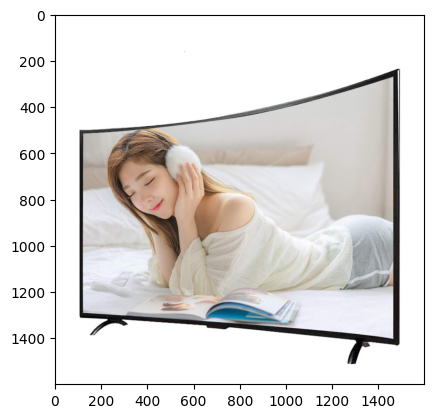

In [27]:
# Tv Recommendations


# Assuming feature_list_tv contains the features of your tv images
neighbors_tv = NearestNeighbors(n_neighbors=5, algorithm='brute', metric='euclidean')
neighbors_tv.fit(feature_list_sofa)

# Get the nearest neighbors for the first tv image (index 0)
distances_tv, indices_tv = neighbors_tv.kneighbors([feature_list_tv[0]])
print("------------------------------------ ORIGINAL IMAGE ------------------------------------\n")

plt.imshow(plt.imread("/content/ecommerce products/tv/13.jpg"))
plt.show()

print("------------------------------------ RECOMMENDED IMAGES ------------------------------------\n")
for file_tv in indices_tv[0][1:5]:
  plt.imshow(plt.imread(filename_tv[file_tv]))
  plt.show()